# Tarea 1
- Alumno: José Nicolas Castillo Rojas

In [37]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Funciones 

In [38]:
def show_img_channel(img):
    r,g,b = cv2.split(img)

    fig, ax = plt.subplots(1, 4, figsize=(12, 13))
    ax[0].imshow(img)
    ax[0].set_title('RGB')
    ax[1].imshow(r,cmap='Reds'),plt.axis('off')
    ax[1].set_title('Canal Rojo')
    ax[2].imshow(g,cmap='Greens'),plt.axis('off')
    ax[2].set_title('Canal Verde')
    ax[3].imshow(b,cmap='Blues')
    ax[3].set_title('Canal Azul')

    plt.show()
    return 0

    

## Paso 1
Descargue una imagen del rostro de una persona (puede ser usted mismo) en color. La 
imagen debe tener aproximadamente 600x600 píxeles y debe poseer colores (no debe 
estar en escala de grises). Despliegue la imagen por el browser o una ventana.

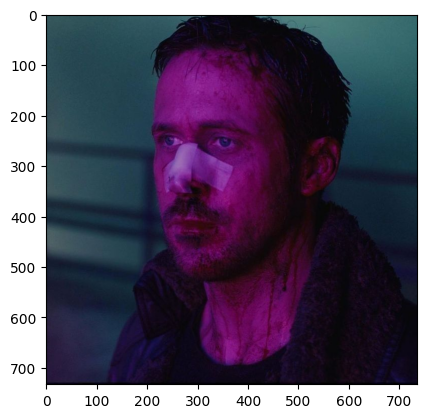

In [39]:
img =cv2.imread('Ryan Gosling.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## Paso 2
Separe los canales de la imagen RGB (paso 1) a tres variables con sus respectivos canales (R, 
G, y B). Luego almacene el resultado de dichas imágenes en diferentes archivos 
independientes 

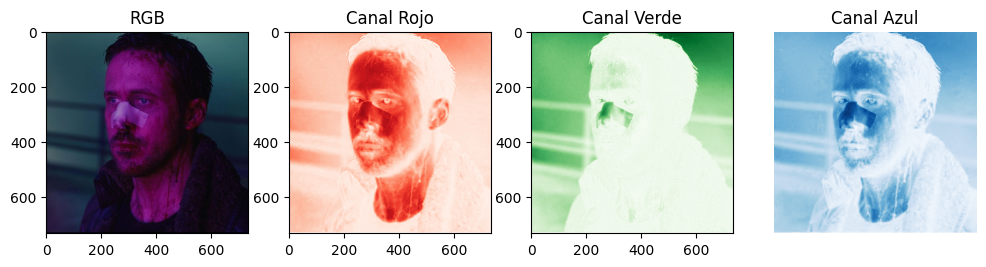

True

In [40]:
show_img_channel(img_rgb) # Mostrar la imagen y sus canales
r_canal, g_canal, b_canal= cv2.split(img_rgb) # Separar los canales de la imagen

# Guardar los canales en archivos 
cv2.imwrite('canal_R.jpg', r_canal)
cv2.imwrite('canal_G.jpg', g_canal)
cv2.imwrite('canal_B.jpg', b_canal)

Se aprecia que en este caso los colores rojos y azul son más dominantes que el verde

## Paso 3
Transforme la imagen a niveles de gris empleando la función de transformación 
(cv2.COLOR_BGR2GRAY). Despliegue la imagen por el browser y compare esta imagen con 
cada uno de los canales R, G y B del paso 2. Para ello calcule la imagen diferencia. Despliege 
el resultado por el browser o una ventana.

Se uso absdiff en base a https://stackoverflow.com/questions/65150972/difference-between-absdiff-and-normal-subtraction-in-opencv

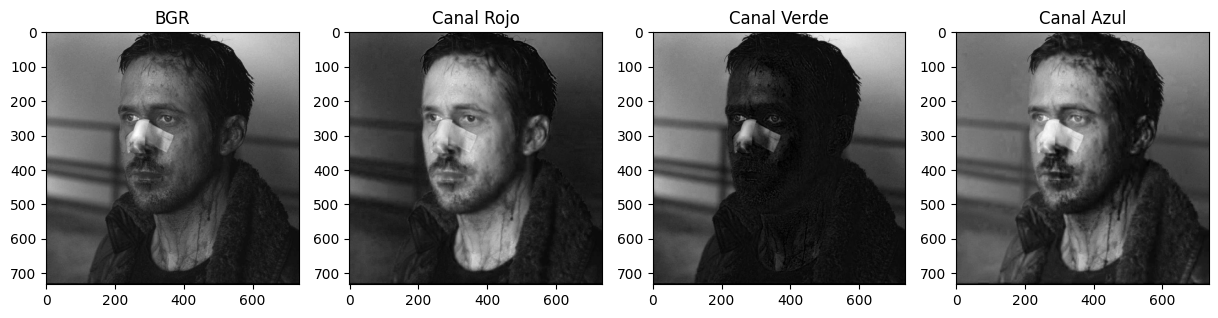

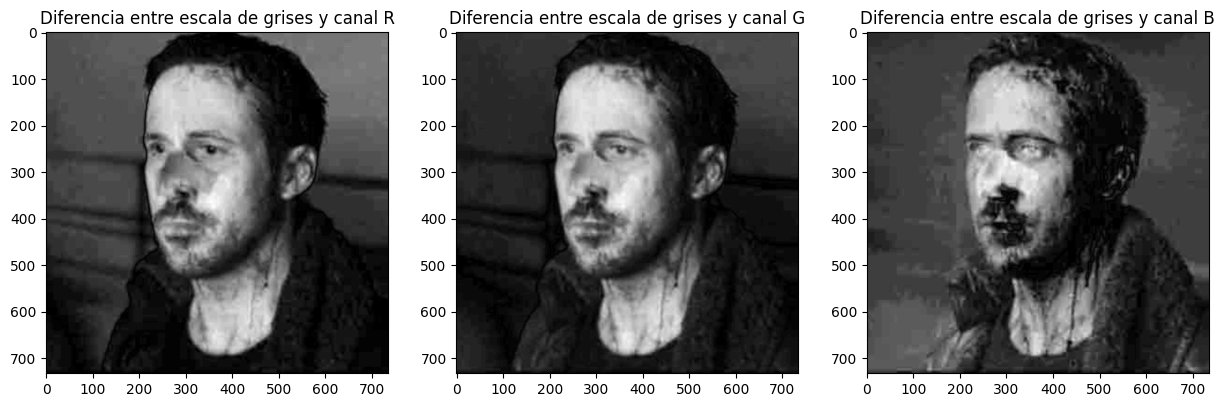

In [41]:
# Usamos la img que tiene el formato BGR para convertirla a escala de grises
img_gris=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

fig, ax = plt.subplots(1, 4, figsize=(15, 13))
ax[0].imshow(img_gris,cmap='gray')
ax[0].set_title('BGR')
ax[1].imshow( r_canal,cmap='gray')
ax[1].set_title('Canal Rojo')
ax[2].imshow( g_canal,cmap='gray')
ax[2].set_title('Canal Verde')
ax[3].imshow(b_canal,cmap='gray')
ax[3].set_title('Canal Azul')
plt.show()

# Calulamos la diferencia entre los canales y la imagen en escala de grises
diferencia_R = cv2.absdiff(img_gris, r_canal)
diferencia_G = cv2.absdiff(img_gris, g_canal)
diferencia_B = cv2.absdiff(img_gris, b_canal)
# Mostrar las diferencias
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(diferencia_R, cmap='gray')
plt.title('Diferencia entre escala de grises y canal R')

plt.subplot(1, 3, 2)
plt.imshow(diferencia_G, cmap='gray')
plt.title('Diferencia entre escala de grises y canal G')

plt.subplot(1, 3, 3)
plt.imshow(diferencia_B, cmap='gray')
plt.title('Diferencia entre escala de grises y canal B')
plt.show()



Al sacar las diferencias entre la imagen original y cada canal de la imagen se puede ver que la imagen resultante pierde calidad, especialmete en al sacar la diferencia de la imagen y el canal azul.

## Paso 4
Ecualice los histogramas de los canales R, G y B, obtenidos en el paso 2 según el algoritmo 
visto en clases y muestre el resultado por el  browser con el resultado de cada ecualización.

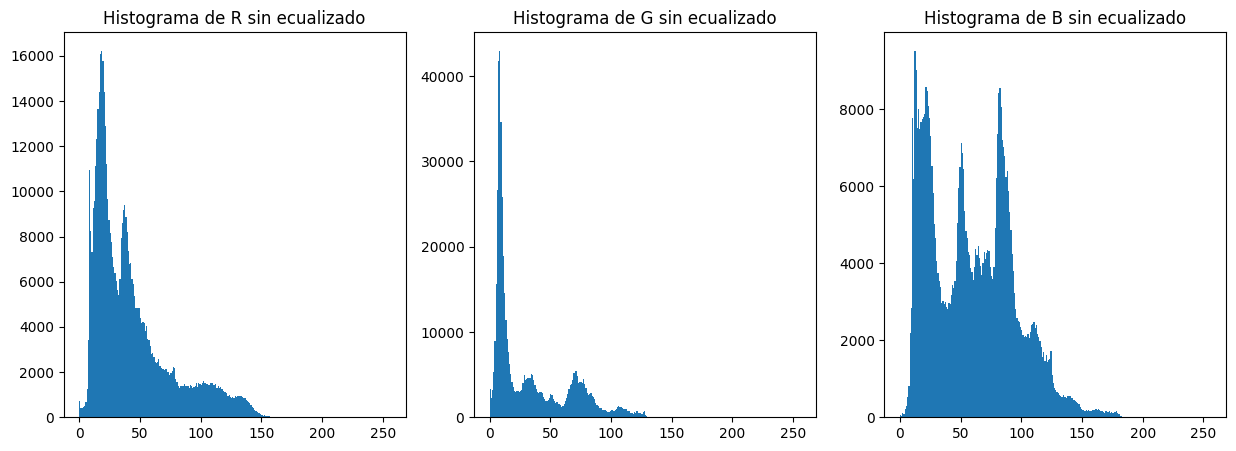

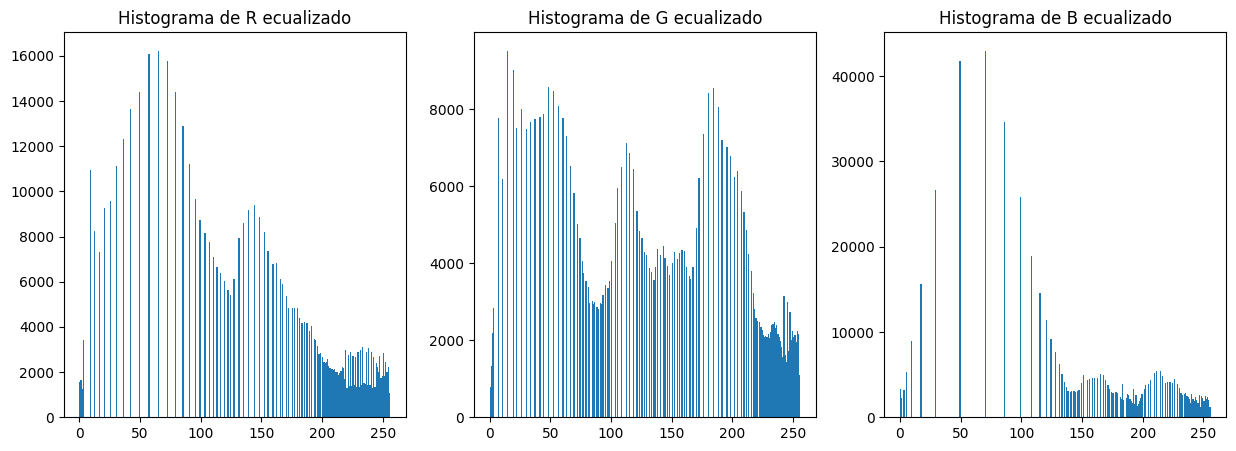

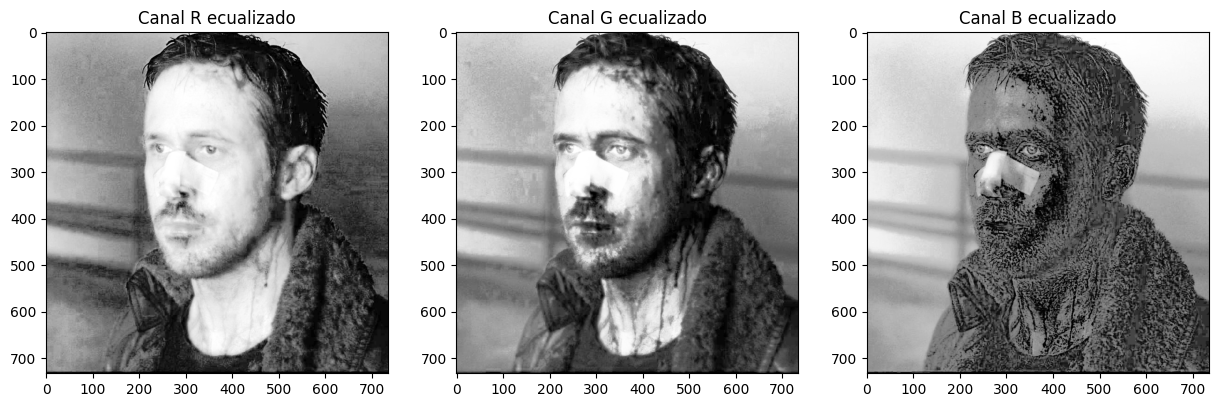

In [42]:
# Mostrar los histogramas de los canales s
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(r_canal.ravel(), bins=256, range=[0,256])
plt.title('Histograma de R sin ecualizado')

plt.subplot(1, 3, 2)
plt.hist(g_canal.ravel(), bins=256, range=[0,256])
plt.title('Histograma de G sin ecualizado')

plt.subplot(1, 3, 3)
plt.hist(b_canal.ravel(), bins=256, range=[0,256])
plt.title('Histograma de B sin ecualizado')
plt.show()


ecualizado_R = cv2.equalizeHist(r_canal)
ecualizado_G = cv2.equalizeHist(b_canal)
ecualizado_B = cv2.equalizeHist(g_canal)
# Mostrar los histogramas de los canales ecualizados
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.hist(ecualizado_R.ravel(), bins=256, range=[0,256])
plt.title('Histograma de R ecualizado')

plt.subplot(1, 3, 2)
plt.hist(ecualizado_G.ravel(), bins=256, range=[0,256])
plt.title('Histograma de G ecualizado')

plt.subplot(1, 3, 3)
plt.hist(ecualizado_B.ravel(), bins=256, range=[0,256])
plt.title('Histograma de B ecualizado')
plt.show()
#Mostar las imagenes ECUALIZADAS
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(ecualizado_R , cmap='gray')
plt.title('Canal R ecualizado')

plt.subplot(1, 3, 2)
plt.imshow(ecualizado_G , cmap='gray')
plt.title('Canal G ecualizado')

plt.subplot(1, 3, 3)
plt.imshow(ecualizado_B , cmap='gray')
plt.title('Canal B ecualizado')
plt.show()

## Paso 5
Modifique las imágenes de paso 3 del siguiente modo. Utilice la función gamma con valor 
0.5 sobre el canal R, 2.5 sobre el canal G y 0.1 sobre el canal B. Almacene estos resultados en 
archivos independientes y despliegue el resultado por el browser.

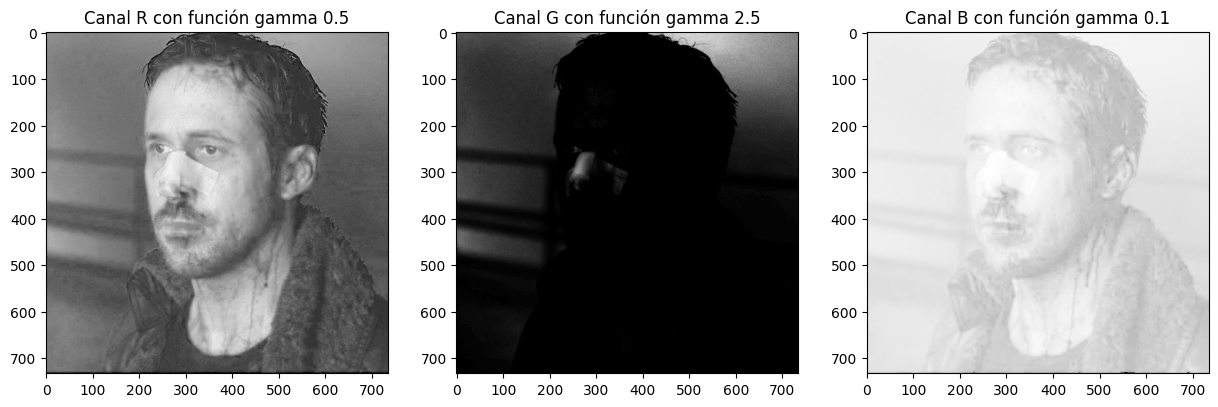

In [43]:
# Aplicar función gamma
gamma_R = np.uint8(cv2.pow(r_canal/255.0, 0.5) * 255.0)
gamma_G = np.uint8(cv2.pow(g_canal/255.0, 2.5) * 255.0) 
gamma_B = np.uint8(cv2.pow(b_canal/255.0, 0.1) * 255.0) 

# Guardar los canales en archivos 
cv2.imwrite('R_gamma_05.jpg', gamma_R)
cv2.imwrite('G_gamma_25.jpg', gamma_B)
cv2.imwrite('B_gamma_01.jpg', gamma_B)


# Mostrar los canales con función gamma
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(gamma_R, cmap='gray')
plt.title('Canal R con función gamma 0.5')

plt.subplot(1, 3, 2)
plt.imshow(gamma_G, cmap='gray')
plt.title('Canal G con función gamma 2.5')

plt.subplot(1, 3, 3)
plt.imshow(gamma_B, cmap='gray')
plt.title('Canal B con función gamma 0.1')
plt.show()

- y=0.1, para el caso del canal B,su intencidad de pixeles era bajo lo que genera que la se vea más brillante el canal.
- y=2.5  para el caso del canal G, la imagen se oscurece más, dado que la intenisidad del calan verde era baja originalmente y con la funcion gama se oscurece 
más
- y=0.5  para el caso del canal R, la imagen no pierde mucha intensidad.

## Paso 6
Reconstruya la imagen a color (con sus tres canales) a partir de los resultados previos. Para 
ello utilice el comando cv2_merge(). Realice las siguientes reconstrucciones:

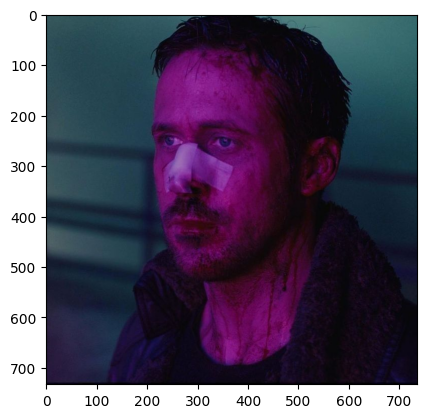

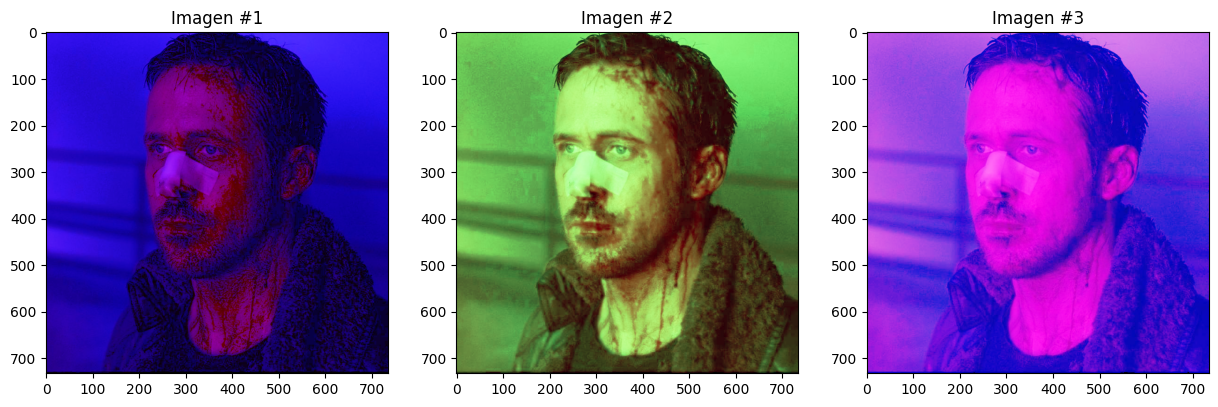

In [44]:
plt.imshow(img_rgb)
plt.show()

# a. Imagen #1: [ R_original, G_gamma_2.5, B_ecualizado ]
imagen_1 = cv2.merge((r_canal, gamma_G, ecualizado_B))

# b. Imagen #2: [ R_gamma_0.5, G_ecualizado, B_original ]
imagen_2 = cv2.merge((gamma_R, ecualizado_G, b_canal))

# c. Imagen #3: [ R_ecualizado, G_original, B_gamma_0.1]
imagen_3 = cv2.merge((ecualizado_R, g_canal, gamma_B))

# Mostrar las imágenes reconstruidas
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(imagen_1)
plt.title('Imagen #1')

plt.subplot(1, 3, 2)
plt.imshow(imagen_2)
plt.title('Imagen #2')

plt.subplot(1, 3, 3)
plt.imshow(imagen_3)
plt.title('Imagen #3')
plt.show()

- imagen#1: La imagen se aprecia que no tuvo mucho cambio en comparación con la original, lo que cambio fue el color de la intencidad del color azul en el fondo, ya que dominas más
- imagen#2: la imagen cambio el color del fondo, dejandolo con un color más verde, pero permite apreciar más el color de la sangre de la cara del personaje, ademas que se ver más clara la imagen.
- imagen#3 : La imagen se completamente en morado, perdiendo el contaste en la zona de la cara.